<a href="https://colab.research.google.com/github/DaviGomesti/MBA_Machine-Learning/blob/main/Atividade02_Classifica%C3%A7%C3%A3o_IRIS_PosDados_ML_Modelo_para_Exerc%C3%ADcios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MBA em Engenharia e Ciência de Dados<br />
Machine Learning

**Nome:**


# Instalação de Pacotes

É possível instalar pacotes de maneira muito simples no Google Colab. Utilize o comando abaixo como exemplo:

`!pip install pandas`

No exemplo, podemos verificar a instalação do pandas. De forma similar utilize para instalar outras bibliotecas.

# Importação das bibliotecas

Algumas bibliotecas não estão disponíveis por padrão no código Python que será utilizado para resolução dos problemas que envolvem Ciência de Dados.

Abaixo um código de exemplo de como importar o sklearn.

`from sklearn.svm import LinearSVR`

O exemplo tem como requisito a instalação do pacote sklearn e neste exemplo está importando o Linear SVR.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score

# Leitura da Base de Dados

A base de dados que será utilizada pode ter diversas fontes, como visto na disciplina de Inferência Estatística e Data Mining.

`pd.read_csv('data.csv') ` <br />
`pd.read_excel('tmp.xlsx', index_col=0)` <br />
`pd.read_json('meu_json.json')`

Estes são alguns exemplos de leitura de arquivos. Mas, pode ser necessário a leitura de outro tipo de base de dados.

In [ ]:
iris = load_iris()

In [ ]:
iris.data

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Visualização dos Dados

É possível utilizar funções como df.head(), ou mesmo plotar algum gráfico para compreender o comportamento dos dados.

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Pré-Processamento
*Apenas se necessário* realizar o pré-processamento. Em casos de estudo a base de dados costuma já ser trabalhada e pronta para os testes. Por outro lado, no mundo real, esta é uma etapa importante.

In [ ]:
df['target'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
target_names = iris.target_names

In [ ]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
dicionario_mapeamento = {
    0: target_names[0],
    1: target_names[1],
    2: target_names[2]
}

In [ ]:
# Função map entre o dataframe e o dicionario
df['target_names'] = df['target'].map(dicionario_mapeamento)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Separação em Treino e Teste

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')

In [ ]:
X = df.drop(['target', 'target_names'], axis=1)
y = df['target']

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=42,
    stratify=y,
    test_size=0.3)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
y_test.shape

(45,)

# Construção dos Modelos

In [ ]:
clf_dt = DecisionTreeClassifier()

In [ ]:
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = clf_dt.predict(X_test)

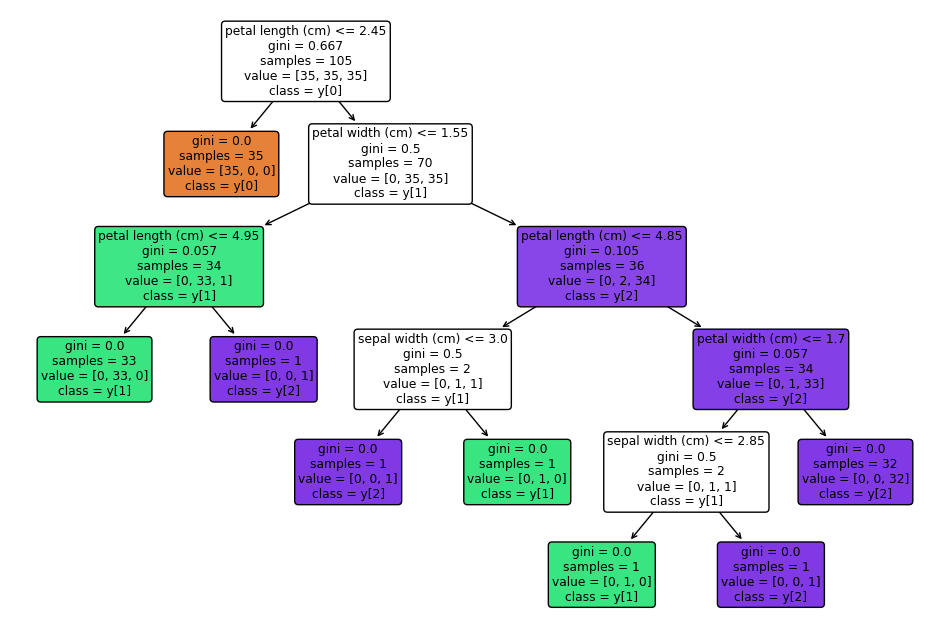

In [ ]:
plt.figure(figsize=(12, 8))  # Ajuste o tamanho da figura conforme necessário
plot_tree(clf_dt, class_names=True, filled=True, rounded=True, feature_names=iris.feature_names)
plt.show()

# Avaliação das Métricas

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.9777777777777777